### Linear transformation of a unit circle inspired by a twitter post of visualisations by [Alfredo Canziani](https://twitter.com/alfcnz/status/1427325113771364352);

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot", "dark_background"])

### Set up data;

In [2]:
data = np.linspace(-np.pi, np.pi, 13)
x1 = np.cos(data[:-1])
y1 = np.sin(data[:-1])

### Plot initial data;

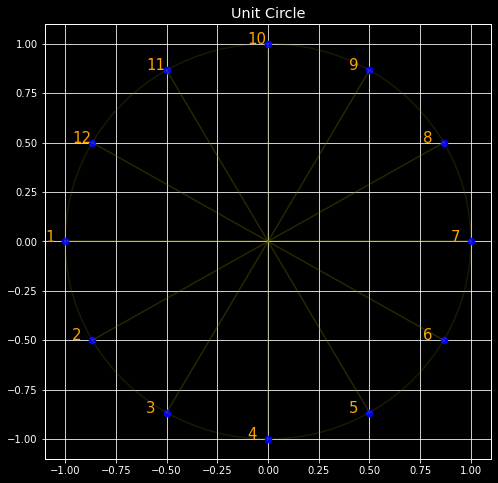

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1, y1, color='b', s=50)
for idx, (x, y) in enumerate(zip(x1, y1), start=1):
    # the vectors in 2 dimensions;
    ax.plot([0, x], [0, y], color="olive", alpha=0.3)
    ax.annotate(idx, (x - 1e-1, y), color='orange', fontsize=15)
# just to draw an actual circle (with line/curve);
temp_data = np.linspace(-np.pi, np.pi, 100)
ax.plot(np.cos(temp_data), np.sin(temp_data), color="olive", alpha=0.2)
ax.set_title("Unit Circle")
plt.show()

In [4]:
def get_transformed_output(source_mat, v1, v2, eigen_vals):
    """
    Gets a pair of vectors (v1, v2) and pretends those are eigenvalues of a matrix
    with eigen values eigen_vals;
    The returned value is the product of the source_mat with the matrix with 
    eigenvectors v1, v2 and eigen values eigen_vals;
    """
    Q = np.hstack((v1.reshape(-1, 1), v2.reshape(-1, 1)))
    L = np.zeros((2, 2))
    L[np.arange(2) == np.arange(2).reshape(-1, 1)] = eigen_vals
    return source_mat @ Q @ L @ Q.T

### Put the unit circle in a matrix form and initialise eigen values;

In [5]:
source_mat = np.hstack((x1.reshape(-1, 1), y1.reshape(-1, 1)))
print(f"source_mat is a: {source_mat.shape} matrix;")
eigen_vals = [3, 2]

source_mat is a: (12, 2) matrix;


### Visualisation of transformation of unit circle;

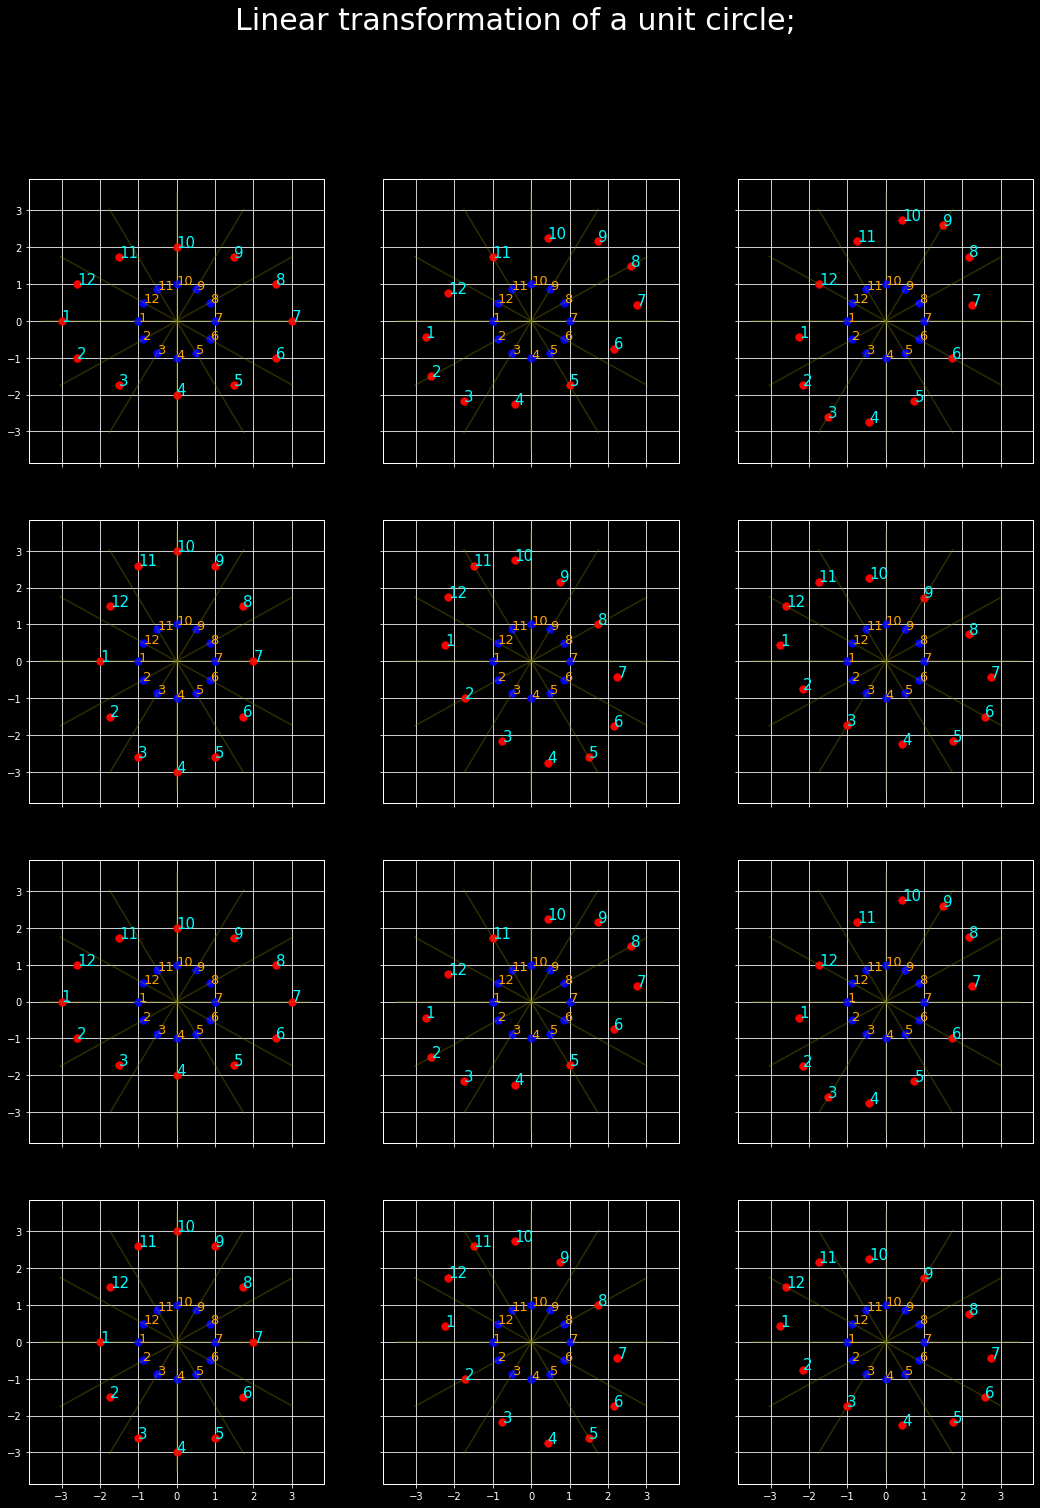

In [6]:
fig, axs = plt.subplots(4, 3, figsize=(18, 24), sharex=True, sharey=True)
for i in range(len(x1)):
    row, col = i // 3, i % 3
    axs[row][col].set_xticks(np.linspace(-4, 4, 9))
    axs[row][col].set_yticks(np.linspace(-4, 4, 9))
    axs[row][col].scatter(x1, y1, color='b', s=60)
    # pick orthonormal pairs of vectors from source_mat;
    transformed = get_transformed_output(source_mat, source_mat[i], 
                                         source_mat[(i + 3) % len(x1)], eigen_vals)
    axs[row][col].scatter(transformed[:, 0], transformed[:, 1], color='r', s=60)
    # now draw eigenvectors and annotate to see the transformations;
    # you should see anti-clockwise rotation of the outer elipse by 15 degrees;
    for idx, (x_u, y_u, x_t, y_t) in enumerate(zip(source_mat[:, 0], source_mat[:, 1],
                                              transformed[:, 0], transformed[:, 1]), start=1):
        axs[row][col].plot([0, 3.5 * x_u], [0, 3.5 * y_u], color="olive", alpha=0.35)
        axs[row][col].annotate(idx, (x_u, y_u), color="orange", fontsize=13)
        axs[row][col].annotate(idx, (x_t, y_t), color="cyan", fontsize=15)
fig.suptitle("Linear transformation of a unit circle;", size=30)
plt.show()